In [ ]:
!pip install git+https://github.com/aimclub/eXplain-NNs &> /dev/null

# !wget https://raw.githubusercontent.com/aimclub/eXplain-NNs/main/requirements.txt
# !pip install -r requirements.txt
! pip install torchmetrics &> /dev/null
! pip install pip install giotto-ph==0.2.2 &> /dev/null
! pip install pip install giotto-tda==0.6.0 &> /dev/null
! pip install umap-learn==0.5.3 &> /dev/null


In [ ]:
from torchvision.datasets import MNIST
import torch
import torch.nn as nn
import torchvision.transforms as TF

In [ ]:
from eXNN.visualization import get_random_input, visualize_layer_manifolds

/usr/local/lib/python3.10/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [ ]:
# load MNIST test to use as input data
ds = MNIST(root='./.cache', train=False, download=True, transform=TF.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 114485700.88it/s]


Extracting ./.cache/MNIST/raw/train-images-idx3-ubyte.gz to ./.cache/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 75286323.07it/s]

Extracting ./.cache/MNIST/raw/train-labels-idx1-ubyte.gz to ./.cache/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25409723.14it/s]


Extracting ./.cache/MNIST/raw/t10k-images-idx3-ubyte.gz to ./.cache/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14918190.11it/s]


Extracting ./.cache/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./.cache/MNIST/raw



In [ ]:
dl = torch.utils.data.DataLoader(ds, batch_size=36, shuffle=True)

## Fully-Connected NN

Let's visualize intermediate representations from 1st and 3rd layers of a shallow fully-connected NN: a fully-connected NN:
* on some random data
* on MNIST

In [ ]:
# create simple model
model = nn.Sequential(nn.Linear(28*28, 256),
                       nn.ReLU(), nn.Linear(256, 64),
                       nn.ReLU(), nn.Linear(64, len(ds.classes)))



# visualize embeddings
layers = ['1', '3']
mode = 'pca'

### MNIST

In [ ]:
data, labels = next(iter(dl))
data = torch.flatten(data, start_dim=1)
visualizations = visualize_layer_manifolds(model, mode, data, layers, labels=labels)

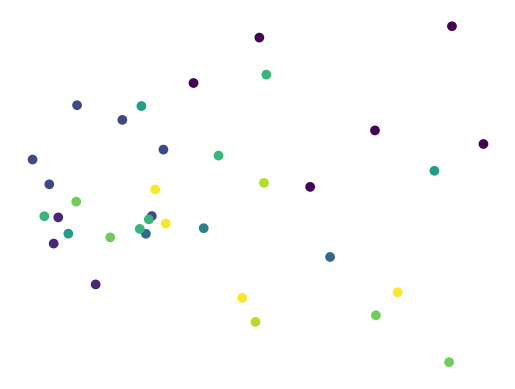

In [ ]:
visualizations['1']

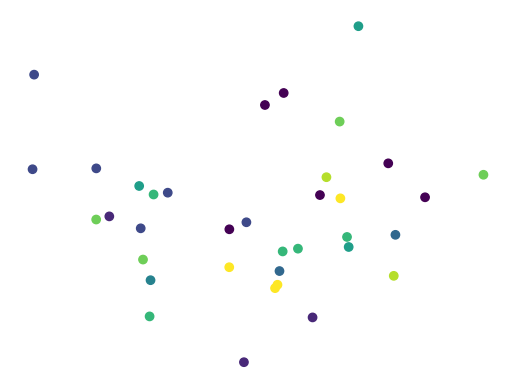

In [ ]:
visualizations['3']

### synthetic data

In [ ]:
# create synthetic data
data = get_random_input([36, 784])
visualizations = visualize_layer_manifolds(model, mode, data, layers)

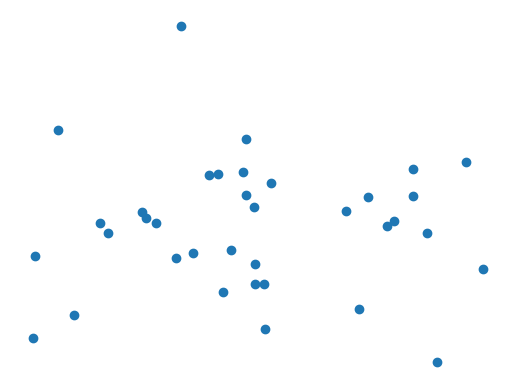

In [ ]:
visualizations['1']

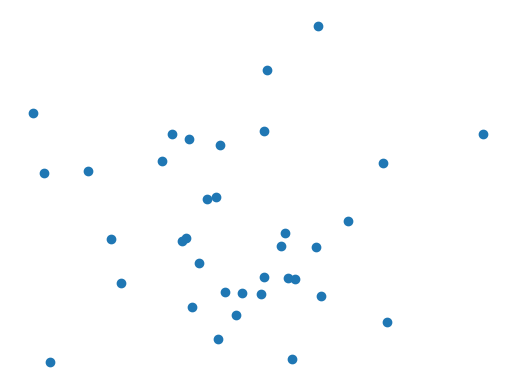

In [ ]:
visualizations['3']

## Convolutional NN

Let's do the same with a CNN. For a change,
* let's use UMAP for dimensionality reduction instead of PCA
* let's make visualizations for all layers of the NN

In [ ]:
model = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2, stride=2),
                      nn.AdaptiveAvgPool2d(output_size=1),
                      nn.Flatten(),
                      nn.Linear(64, len(ds.classes)))

In [ ]:
mode = 'umap'

### MNIST

In [ ]:
data, labels = next(iter(dl))
visualizations = visualize_layer_manifolds(model, mode, data, labels=labels)

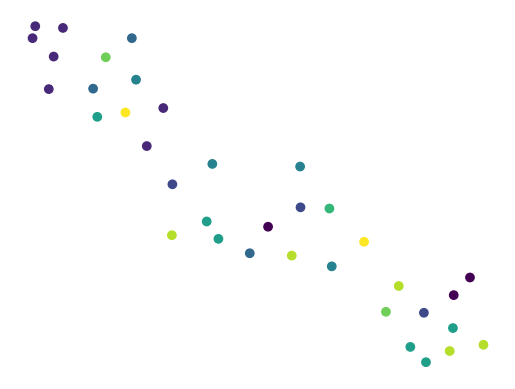

In [ ]:
visualizations['6']

### synthetic data

In [ ]:
# create synthetic data
data = get_random_input([36, 1, 28, 28])
visualizations = visualize_layer_manifolds(model, mode, data)

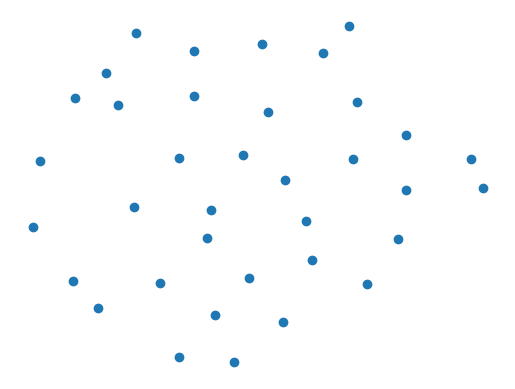

In [ ]:
visualizations['5']